# Import

In [1]:
# basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
# # data visualization
# import seaborn as sns
# import matplotlib.colors as mat_colors
# from mpl_toolkits.mplot3d import Axes3D
# from autoviz.AutoViz_Class import AutoViz_Class
# from IPython.display import SVG

In [3]:
import spacy
import re

In [4]:
link_train = "https://raw.githubusercontent.com/Pieter414/Projects/main/dataset_penyisihan_bdc_2024(in).csv"
link_test = "https://raw.githubusercontent.com/Pieter414/Projects/main/dataset_unlabeled_penyisihan_bdc_2024(in).csv"

In [6]:
train_df = pd.read_csv('/content/cleaned_without_hash.csv', delimiter=",")
test_df = pd.read_csv(link_test, delimiter=";")

# Overview

In [7]:
train_df

,text,label,check_lupa_spasi
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,False
1,anies dapat tepuk tangan meriah saat jadi rekt...,Politik,False
2,emng bener sih pendukung 01 ada yg begitu juga...,Demografi,False
3,sewaktu anies bersikap kritis ke kinerja pak p...,Politik,False
4,anies baswedan harap asn termasuk tni dan polr...,Politik,False
...,...,...,...
4578,ngeliat debat kemaren pas prabowo kicep kekira...,Politik,False
4579,masyarakat yakin bahwa prabowo gibran memiliki...,Politik,False
4580,imo both are irrational but yg satu jauh lebih...,Ekonomi,False
4581,look at that pak ganjar anda sudah berkecimpun...,Pertahanan dan Keamanan,False


In [8]:
test_df

,IDText,Text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...
...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan..."
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...


In [9]:
print(train_df.shape)
print(test_df.shape)

(4583, 3)
(1000, 2)


In [10]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4583 entries, 0 to 4582
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              4583 non-null   object
 1   label             4583 non-null   object
 2   check_lupa_spasi  4583 non-null   bool  
dtypes: bool(1), object(2)
memory usage: 76.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IDText  1000 non-null   object
 1   Text    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [11]:
train_df.describe()

,text,label,check_lupa_spasi
count,4583,4583,4583
unique,4273,8,2
top,bulan januari ini serangan dari kubu dkk akan ...,Politik,False
freq,33,2952,4569


In [12]:
test_df.describe()

,IDText,Text
count,1000,1000
unique,1000,1000
top,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
freq,1,1


In [13]:
train_df.isna().sum()

text                0
label               0
check_lupa_spasi    0
dtype: int64

In [14]:
train_df.duplicated().sum()

284

In [15]:
test_df.duplicated().sum()

0

In [16]:
train_df[train_df.duplicated()]

,text,label,check_lupa_spasi
59,sewaktu anies bersikap kritis ke kinerja pak p...,Politik,False
126,bulan januari ini serangan dari kubu dkk akan ...,Pertahanan dan Keamanan,False
141,bulan januari ini serangan dari kubu dkk akan ...,Pertahanan dan Keamanan,False
147,bulan januari ini serangan dari kubu dkk akan ...,Pertahanan dan Keamanan,False
148,capres cawapres ganjar pranowo dan mahfud md m...,Ideologi,False
...,...,...,...
4520,netizen geger haikal hassan gunakan politik id...,Politik,False
4522,cukup liat track recordnya ganjar pranowo dan ...,Politik,False
4544,bukan cuma tampilan luarnya tapi kebijakan gan...,Ideologi,False
4574,bulan januari ini serangan dari kubu dkk akan ...,Pertahanan dan Keamanan,False


In [17]:
all_duplicated_texts = train_df[train_df['text'].duplicated(keep=False)]

print("\nDetailed comparison of duplicated text entries:")
grouped = all_duplicated_texts.groupby('text')
for name, group in grouped:
    print(f"\nText: {name}")
    print(group)


Detailed comparison of duplicated text entries:

Text: 07 100 food estate mulai dicanangkan pada 3 tahun lalu tepatnya pada 6 juli 2020 dibantu oleh menteri pupr dan menteri pertanian secara garis besar food estate adalah program ekstensifikasi pertanian membuka lahan yg besar dan mengubahnya menjadi lahan pertanian 2 bulan setelah dicanangkan food estate mulai dikerjakan di kalimantan tengah yaitu daerah gunung emas sedangkan pt yang terlibat dalam program ini berdasarkan penelusuran tempo adalah pt yang baru dibentuk 5 bulan sebelumnya yaitu pt agrinas dimana susunan direksinya terdapat setidaknya 3 dari gerindra dan banyak juga staff agrinas merangkap sebagai pegawai kementerian pertahanan di food estate food estate berencana untuk membuka 6 ribu hektar hutan hujan tropis tepat 4 bulan setelah dicanangkan beberapa anggota tni terlibat dalam pembabatan hutan dimana hutan yang sudah dibuka saat itu sekitar 670 hektar dan karena itu adalah hutan tentunya banyak kayu yg dihasilkan kema

In [18]:
train_df.nunique()

text                4273
label                  8
check_lupa_spasi       2
dtype: int64

In [19]:
train_df['label'].value_counts()

label
Politik                    2952
Sosial Budaya               419
Ideologi                    339
Pertahanan dan Keamanan     330
Ekonomi                     309
Sumber Daya Alam            154
Demografi                    60
Geografi                     20
Name: count, dtype: int64

# Preprocessing

In [20]:
def counter_word(df):
  counter = df_clean_label['text'].apply(lambda x:str(x).split())
  top = Counter([item for sublist in counter for item in sublist])
  temp = pd.DataFrame(top.most_common(20))
  temp.columns = ['Common_words','count']
  return temp.style.background_gradient(cmap='Blues')


def counter_word2(df, num):
  counter = df_clean_label['text'].apply(lambda x:str(x).split())
  top = Counter([item for sublist in counter for item in sublist if len(item) > num])
  temp = pd.DataFrame(top.most_common(100))
  temp.columns = ['Common_words','count']
  return temp.style.background_gradient(cmap='Blues')

In [21]:
def print_df(df):
  for text, label in zip(df['text'].iloc[0:10], df['label'].iloc[0:10]):
    print("Label:", label)
    print("Text:", text)
    print()

In [22]:
train_df['original_text'] = train_df['text']

## Hapus huruf kecil, angka, pattern, @ username, rt, simbol dkk

In [23]:
def clean_text(text):
    text = text.lower()  # Ubah ke huruf kecil
    #text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'\[.*?\]', '', text)  # Hapus [[pattern]
    text = re.sub(r'@[a-zA-Z0-9+/]+=', '', text) # Hapus yang gak jelas (@asdadaidajsda=)
    text = re.sub(r'\brt\b', '', text)# hapus rt
    text = re.sub(r'[^\x00-\x7F]+', '', text) # Hapus simbol aneh
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih

    return text
label = train_df['label']
df_clean = train_df['text'].apply(clean_text)
df_clean_label = pd.concat([df_clean, label], axis=1)
for text, label in zip(df_clean_label['text'].iloc[0:10], df_clean_label['label'].iloc[0:10]):
    print("Label:", label)
    print("Text:", text)
    print()

Label: Sumber Daya Alam
Text: kunjungan prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik prabowo subianto

Label: Politik
Text: anies dapat tepuk tangan meriah saat jadi rektor mewajibkan mata kuliah antikorupsi untuk memutus mata rantai korupsi

Label: Demografi
Text: emng bener sih pendukung 01 ada yg begitu juga dg pendukung 02 hnya sj menurut pak ridwan kamil skemanya terbalik kalau 01 mayoritas pendidikan menengah atas artinya ada juga pendidikan rendah yg milih

Label: Politik
Text: sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras apakah ini tidak standar ganda

Label: Politik
Text: anies baswedan harap asn termasuk tni dan polri pegang sumpahnya dalam pemilu

Label: Politik
Text: duh jangan sampai pak lurah denger nih di acara hajatan rakyat puluhan ribu warga di kendal serukan ganjar presiden kehad

## Duplicates

In [24]:
df_drop_duplicate = df_clean_label.drop_duplicates(subset='text')

In [25]:
df_drop_duplicate.duplicated().sum()

0

In [26]:
df_drop_duplicate.shape

(4273, 2)

<ipython-input-27-9e82cca025e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_duplicate['length']=df_drop_duplicate['text'].apply(len)


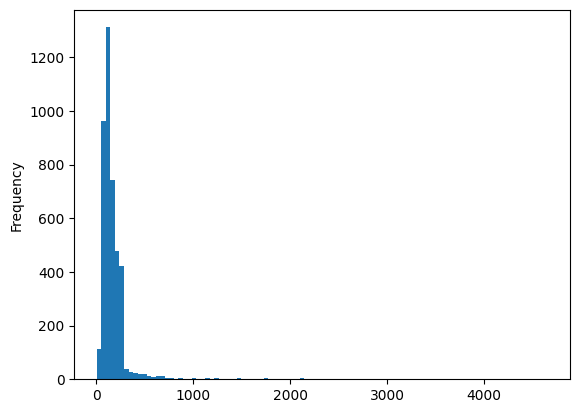

In [27]:
#mencari tau panjang text
df_drop_duplicate['length']=df_drop_duplicate['text'].apply(len)

df_drop_duplicate['length'].plot(bins=100, kind='hist')
plt.show()

In [28]:
df_drop_duplicate.describe()

,length
count,4273.000000
mean,181.857711
std,250.250980
min,7.000000
25%,100.000000
50%,136.000000
75%,199.000000
max,4658.000000


In [29]:
df_drop_duplicate[df_drop_duplicate['length'] == 45]['text'].iloc[0]

'anies sesuai selera masyarakat sumatera barat'

## Hastags Handling

In [30]:
#Mencari hastags
def extract_hashtags(text):
    return re.findall(r'#(\w+)', text)

train_df['hashtags'] = train_df['text'].apply(extract_hashtags)

hashtag_counts = train_df.groupby('label')['hashtags'].apply(lambda x: pd.Series(x.sum()).value_counts())

hashtag_table = hashtag_counts.unstack(fill_value=0)

print(hashtag_table)

Empty DataFrame
Columns: []
Index: []


## Merge two preprocess (Duplicate and symbol handling)

In [31]:
label = df_drop_duplicate['label']

In [32]:
df_clean = df_drop_duplicate['text'].apply(clean_text)

In [33]:
df_clean_label = pd.concat([df_clean, label], axis=1)
df_clean_label.shape

(4273, 2)

In [34]:
print_df(df_clean_label)

Label: Sumber Daya Alam
Text: kunjungan prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik prabowo subianto

Label: Politik
Text: anies dapat tepuk tangan meriah saat jadi rektor mewajibkan mata kuliah antikorupsi untuk memutus mata rantai korupsi

Label: Demografi
Text: emng bener sih pendukung 01 ada yg begitu juga dg pendukung 02 hnya sj menurut pak ridwan kamil skemanya terbalik kalau 01 mayoritas pendidikan menengah atas artinya ada juga pendidikan rendah yg milih

Label: Politik
Text: sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras apakah ini tidak standar ganda

Label: Politik
Text: anies baswedan harap asn termasuk tni dan polri pegang sumpahnya dalam pemilu

Label: Politik
Text: duh jangan sampai pak lurah denger nih di acara hajatan rakyat puluhan ribu warga di kendal serukan ganjar presiden kehad

In [35]:
# untuk membandingkan dengan raw text
print_df(train_df)

Label: Sumber Daya Alam
Text: kunjungan prabowo ini untuk meresmikan dan menyerahkan proyek bantuan air bersih di lima titik prabowo subianto

Label: Politik
Text: anies dapat tepuk tangan meriah saat jadi rektor mewajibkan mata kuliah antikorupsi untuk memutus mata rantai korupsi

Label: Demografi
Text: emng bener sih pendukung 01 ada yg begitu juga dg pendukung 02 hnya sj menurut pak ridwan kamil skemanya terbalik kalau 01 mayoritas pendidikan menengah atas artinya ada juga pendidikan rendah yg milih

Label: Politik
Text: sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras apakah ini tidak standar ganda

Label: Politik
Text: anies baswedan harap asn termasuk tni dan polri pegang sumpahnya dalam pemilu

Label: Politik
Text: duh jangan sampai pak lurah denger nih di acara hajatan rakyat puluhan ribu warga di kendal serukan ganjar presiden kehad

## Stop Words Handling

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Unduh daftar stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
counter_word(df_clean_label)

,Common_words,count
0,dan,2378
1,yang,2186
2,anies,1907
3,di,1855
4,prabowo,1797
5,ganjar,1728
6,untuk,1063
7,pak,1022
8,tidak,1009
9,ini,967


In [38]:
# Daftar stopwords bahasa Indonesia (tambahkan kata-kata yang ingin dihapus)
stop_words = set(stopwords.words('indonesian'))
custom_stop_words = {'dan', 'di', 'dll', 'yg', 'jnk', 'jadi', 'sama', 'jdi'}
stop_words = stop_words.union(custom_stop_words)

# Fungsi untuk menghapus stopwords
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [39]:
# Terapkan fungsi ke kolom teks
df_clean_label['text'] = df_clean_label['text'].apply(remove_stopwords)

print_df(df_clean_label)

Label: Sumber Daya Alam
Text: kunjungan prabowo meresmikan menyerahkan proyek bantuan air bersih titik prabowo subianto

Label: Politik
Text: anies tepuk tangan meriah rektor mewajibkan mata kuliah antikorupsi memutus mata rantai korupsi

Label: Demografi
Text: emng bener sih pendukung 01 dg pendukung 02 hnya sj ridwan kamil skemanya terbalik 01 mayoritas pendidikan menengah pendidikan rendah milih

Label: Politik
Text: anies bersikap kritis kinerja prabowo dianggap engga sopan dianggap menghormati orang tua giliran skrg gibran tengil sok kritis dianggap kritis keras standar ganda

Label: Politik
Text: anies baswedan harap asn tni polri pegang sumpahnya pemilu

Label: Politik
Text: duh lurah denger nih acara hajatan rakyat puluhan ribu warga kendal serukan ganjar presiden kehadiran magnet puluhan ribu warga menghadiri hajatan rakyat ganjarmahfud besarnya antusiasme warga bukti jawa kandang banteng

Label: Pertahanan dan Keamanan
Text: prabowo kemenhan tim satgas air unhan kaji bantuan 

## Melihat kata paling banyak dalam datset

In [40]:
counter_word(df_clean_label)

,Common_words,count
0,anies,1907
1,prabowo,1797
2,ganjar,1728
3,pranowo,851
4,mahfud,796
5,indonesia,638
6,capres,529
7,gibran,528
8,md,459
9,rakyat,419


## Standard Rude Word Handling

In [49]:
df_clean_label[df_clean_label['text'].str.contains('', case=False)]

,text,label
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik
2,emng bener sih pendukung 01 dg pendukung 02 hn...,Demografi
3,anies bersikap kritis kinerja prabowo dianggap...,Politik
4,anies baswedan harap asn tni polri pegang sump...,Politik
...,...,...
4578,ngeliat debat kemaren pas prabowo kicep kekira...,Politik
4579,masyarakat prabowo gibran memiliki visi sejala...,Politik
4580,imo both are irrational but irrational tbh but...,Ekonomi
4581,look at that ganjar berkecimpung lgislatif eks...,Pertahanan dan Keamanan


In [50]:
rude_words = {
    "anjing":"",
    "anj":"",
    "bacot":"",
    "monyet":"",
    "babi":"",
    "goblok":"",
    "goblok-goblokin":"",
    "ngegoblok2in":"",
    "goblokgoblokin":"",
    "ngebacot":"ngatain",
    "asu":"",
    "anjirrrrr":"",
    "tolol":"bodoh",
    "anjay":"",
    "kampret":"",
    "sialan":"",
    "bangsat":"",
    "bongol":"",
    "anjir":"",
    "sundal":"",
    "jancuk":"",
    "jancok":"",
    "ndhasmu":"",
    "ndasmu":"",
    "picek":"",
    "budeg":"",
    "bego":"",
    "goblog":"",
    "kontol": "",
    "memek": "",
    "ngentot": "",
    "pepek": "",
    "tetek": "",
    "ngewe": "",
    "pantek": "",
    "taek": "",
    "setan": "",
    "bajingan": "",
    "brengsek": "",
    "pelacur": "",
    "lonte": "",
    "bencong": "",
    "banci": "",
    "telaso": "",  # slang in some regions
    "fuck": "",  # English profanity sometimes used
    "shit": "",   # English profanity sometimes used
    "cibai": "",  # loanword from Chinese slang
    "jembut": "",
    "keparat": "",
    "perek": "",
    "puki": "",
    "kolop": "",
    "kunyuk": "",
    "bejad": "",
    "biadab": "",
    "dajjal": "",
    "cuki": "",   # variant of more vulgar terms
    "pukimak": "",  # vulgar, sometimes seen in mixed language contexts
    "mampus": "",
    "babik": "",
    "kimak": "",
    "njir":"",
}

In [51]:
def preprocess_rude_word(text):
    if pd.isna(text):
        return text

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = [rude_words.get(word, word) for word in words]

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

# Fungsi untuk memproses kolom teks dalam DataFrame
def preprocess_dataframe(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_rude_word)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe(df_clean_label, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     emng bener sih pendukung 01 dg pendukung 02 hn...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4578  ngeliat debat kemaren pas prabowo kicep kekira...   
4579  masyarakat prabowo gibran memiliki visi sejala...   
4580  imo both are irrational but irrational tbh but...   
4581  look at that ganjar berkecimpung lgislatif eks...   
4582  acara memasak calon presiden nomor urut 2 meng...   

                        label  
0            Sumber Daya Alam  
1                     Politik  
2                   Demografi  
3                     Politik  
4                     Politik  
...                       ...  
4578                  Politik  
4579            

## Filter KamusAlay

In [52]:
kamus_link = "https://raw.githubusercontent.com/Pieter414/Projects/main/kamusalay.csv"
kamus = pd.read_csv(kamus_link, delimiter=",", header=None).rename(columns={0:"alay", 1:"baku"})
kamus

,alay,baku
0,ajh,saja
1,ajj,saja
2,akoh,aku
3,amaca,ah masa
4,amuh,kamu
...,...,...
234,yaw,ya
235,yoi,iya
236,yups,ya
237,yupz,ya


In [53]:
kamus_dict = kamus.set_index('alay')['baku'].to_dict()
kamus_dict

{'ajh': 'saja',
 'ajj': 'saja',
 'akoh': 'aku',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'aph': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'aq': 'saya',
 'baryaw': 'sabar ya',
 'baryw': 'sabar ya',
 'bryaw': 'sabar ya',
 'bryw': 'sabar ya',
 'bay': 'selamat tinggal',
 'besoq': 'besok',
 'beud': 'banget',
 'bhay': 'selamat tinggal',
 'bisya': 'bisa',
 'biza': 'bisa',
 'bntr': 'sebentar',
 'bokap': 'ayah',
 'bkap': 'ayah',
 'bkp': 'ayah',
 'bokaps': 'ayah',
 'bokapz': 'ayah',
 'bs': 'bisa',
 'bsa': 'bisa',
 'bsk': 'besok',
 'bsoq': 'besok',
 'bte': 'bosan',
 'bozen': 'bosan',
 'bozn': 'bosan',
 'bzn': 'bosan',
 'bzen': 'bosan',
 'cabut': 'pergi',
 'caiank': 'sayang',
 'cekola': 'sekolah',
 'cekolah': 'sekolah',
 'celalaw': 'selalu',
 'celalu': 'selalu',
 'cemungudh': 'semangat',
 'cemungut': 'semangat',
 'cemunguth': 'semangat',
 'cibuq': 'sibuk',
 'cini': 'sini',
 'ciyus': 'serius',
 'cll': 'selalu',
 'cllu': 'selalu',
 'cllw': 'selalu',
 'cpe': 'capek',
 'cpee': 'capek',
 'cewe': 'cewek',
 

In [54]:
tambahan = {
    'abahanies':'bapak anies',
    'pesanuntukabah':'pesan untuk bapak',
    'spotabahanies':'spot bapak anies',
    'abahnya':'bapaknya',
    'abahswedan':'anies',
    'humaniessayangabah':'sayang bapak',
    'hwaitingabahanies':'semangat bapak anies',
}

kamus_dict.update(tambahan)

In [55]:
df_clean_label[df_clean_label['text'].str.contains(' pecundang ', case=False)]

,text,label
3004,tega amp apatis ya penempatan sikap dlm beremp...,Politik
3909,didukung presiden ngobok2 mk ketar ketir dukun...,Politik


In [56]:
def preprocess_alay_word(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        if word in kamus_dict:
            corrected_word = kamus_dict[word]
            corrected_words.append(corrected_word)
            # print(f"Changed '{word}' to '{corrected_word}'")  # Logging perubahan
        else:
            corrected_words.append(word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text


# Fungsi untuk memproses kolom teks dalam DataFrame
def preprocess_dataframe2(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_alay_word)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe2(process_df, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     emng bener sih pendukung 01 dg pendukung 02 hn...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4578  ngeliat debat kemaren pas prabowo kicep kekira...   
4579  masyarakat prabowo gibran memiliki visi sejala...   
4580  imo both are irrational but irrational tbh but...   
4581  look at that ganjar berkecimpung lgislatif eks...   
4582  acara memasak calon presiden nomor urut 2 meng...   

                        label  
0            Sumber Daya Alam  
1                     Politik  
2                   Demografi  
3                     Politik  
4                     Politik  
...                       ...  
4578                  Politik  
4579            

## Cek Singkatan/Akronim

In [57]:
singkatan = pd.read_csv('https://raw.githubusercontent.com/aliakbars/bilp/master/singkatan-lib.csv', header=None).rename(columns={0:"singkatan", 1:"baku"})
singkatan = singkatan.set_index('singkatan')['baku'].to_dict()
singkatan

{'aja': 'saja',
 'akn': 'akan',
 'aku': 'saya',
 'amien': 'aamiin',
 'amin': 'aamiin',
 'and': 'dan',
 'anda': 'kamu',
 'ane': 'saya',
 'ap': 'apa',
 'aps': 'apa',
 'aq': 'saya',
 'bag': 'bagian',
 'banget': 'sangat',
 'beud': 'sangat',
 'bgmn': 'bagaimana',
 'bgt': 'sangat',
 'bkan': 'bukan',
 'bl': 'bila',
 'blg': 'bilang',
 'blh': 'boleh',
 'blm': 'belum',
 'blom': 'belum',
 'blum': 'belum',
 'bpk': 'bapak',
 'bs': 'bisa',
 'bsa': 'bisa',
 'bsk': 'besok',
 'cb': 'coba',
 'cm': 'hanya',
 'cma': 'hanya',
 'cuma': 'hanya',
 'd': 'di',
 'dg': 'dengan',
 'dgn': 'dengan',
 'dlm': 'dalam',
 'dn': 'dan',
 'dng': 'dengan',
 'dpt': 'dapat',
 'dr': 'dari',
 'drpd': 'daripada',
 'dsar': 'dasar',
 'dy': 'dia',
 'dya': 'dia',
 'en': 'dan',
 'enggak': 'tidak',
 'ente': 'kamu',
 'g': 'tidak',
 'ga': 'tidak',
 'gak': 'tidak',
 'gitu': 'begitu',
 'gk': 'tidak',
 'gt': 'begitu',
 'gtau': 'tidak tahu',
 'gua': 'saya',
 'gub': 'gubernur',
 'gue': 'saya',
 'gw': 'saya',
 'hny': 'hanya',
 'hrs': 'harus',


In [58]:
singkatan_added_2_link = 'https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv'
singkatan_added_2 = pd.read_csv(singkatan_added_2_link, header=None, delimiter=';').rename(columns={0:"singkatan", 1:"baku"}).set_index('singkatan')['baku'].to_dict()
singkatan.update(singkatan_added_2)

In [59]:
singkatan_added = {
    'lol':'lawak',
    'amp':'sampai',
    'smpai':'sampai',
    'dlm':'dalam',
    'lo':'kamu',
    'bener':'benar',
    'tpi':'tapi',
    'didukung':'dukung',
    'anis':'anies',
    'dsna':'sana',
    'sbg':'sebagai',
    'hr':'hari',
    'ketum':'ketua umum',
    'e':'eh',
    'jkw': 'jokowi',
    'dr': 'dari',
    'uu': 'undang-undang',
    'pake': 'pakai',
    'kt': 'kata',
    'rb': 'ribu',
    'hrsnya': 'harusnya',
    'krn': 'karena',
    'coi': 'sahabat',  # informal, tergantung konteks
    'ama': 'sama',
    'gini': 'begini',
    'euy': 'lho',
    'mending': 'lebih baik',
    'santai': 'tenang',  # Konteks ini bisa bervariasi tergantung pada penggunaan
    'ngebacot': 'bicara',  # Formalisasi dari slang
    'ngatain': 'kata',
    'kalo': 'kalau',
    'gemoysian': 'dukung prabowo',  # Kata gaul yang bisa berarti merasa kesal atau gemas
    'wowo': 'prabowo',
    'gumay': 'lucu',  # Slang, perlu konteks lebih untuk definisi tepat
    'gemoy':'lucu',
    'berkuasa': 'kuasa',
    'dibeli': 'dipilih',
    'aminajadulu': 'amin dulu saja',
    'capres': 'calon presiden',
    'cawapres': 'calon wakil presiden',
    'nahh':'nah',
    'utk':'untuk',
    'dgn':'dengan',
    'dg':'dengan',
    'ngerti':'mengerti',
    'ttg':'tentang',
    'adlh':'adalah',
    'hrs':'harus',
    'sgb':'sebagai',
    'untk':'untuk',
    'yh':'yah',
    'mgkn':'mungkin',
    'blm':'belum',
    'msk':'masuk',
    'bgt':'begitu',
    'yha':'yah',
    'aja':'saja',
    'taun':'tahun',
    'alih2':'alihalih',
    'tiba2':'tibatiba',
    'shg':'sehingga',
    'nyinyir':'cibir',
    'met':'selamat',
    'td':'tadi',
    'nan':'dan',
    'bykan':'banyakan',
    'vs':'lawan',
    'krna':'karena',
    'karna':'karena',
    'adaah':'adalah',
    'krna':'karena',
    'serem':'seram',
    'ak':'saya',
    'perna':'pernah',
    'bngt':'sekali',
    'lhoooo':'lho',
    'taaa':'ya',
    'tnidgn':'tni dengan',
    'mempertanyakn':'mempertanyakan',
    'sblum':'sebelum',
    'gitu':'begitu',
    'pnh':'pernah',
    'guys':'teman-teman',
    'mah':'yah',
    'merka':'mereka',
    'mrka':'mereka',
    'ad':'ada',
    'aamin':'amin',
    'pj':'pejabat',
    'mkin':'makin',
    'trbaik':'terbaik',
    'bencipadahal':'benci padahal',
    'benerbener':'bener-bener',
    'smntra':'sementara',
    'kmren2':'kemarin',
    'msyrkt':'masyarakat',
    'jkwdo2':'jokowi dodo',
    'ktk':'ketika',
    'ujung2nya':'ujungnya'
}

singkatan.update(singkatan_added)

In [60]:
process_df[process_df['text'].str.contains(' jadi ', case=False)]

,text,label


In [61]:
def preprocess_singkatan(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        # Menggunakan .get() untuk menghindari KeyError
        corrected_word = singkatan.get(word, word)  # Jika kunci tidak ada, kembalikan kata asli
        corrected_words.append(corrected_word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

def preprocess_dataframe22(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_singkatan)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe22(process_df, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     memang  benar sih pendukung 01 dengan pendukun...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4578  ngeliat debat kemarin  pas prabowo kicep kekir...   
4579  masyarakat prabowo gibran memiliki visi sejala...   
4580  imo both are irrational but irrational tbh but...   
4581  look at that ganjar berkecimpung lgislatif eks...   
4582  acara memasak calon presiden nomor urut 2 meng...   

                        label  
0            Sumber Daya Alam  
1                     Politik  
2                   Demografi  
3                     Politik  
4                     Politik  
...                       ...  
4578                  Politik  
4579            

## Filter > 25 word (Hashtag)

In [62]:
def check_long_words(text):
    words = text.split()
    return any(len(word) > 25 for word in words)

# Menerapkan fungsi ke DataFrame
process_df['check_lupa_spasi'] = process_df['text'].apply(check_long_words)

process_df

,text,label,check_lupa_spasi
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,False
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,False
2,memang benar sih pendukung 01 dengan pendukun...,Demografi,False
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,False
4,anies baswedan harap asn tni polri pegang sump...,Politik,False
...,...,...,...
4578,ngeliat debat kemarin pas prabowo kicep kekir...,Politik,False
4579,masyarakat prabowo gibran memiliki visi sejala...,Politik,False
4580,imo both are irrational but irrational tbh but...,Ekonomi,False
4581,look at that ganjar berkecimpung lgislatif eks...,Pertahanan dan Keamanan,False


In [63]:
kamus_long = {
    'munculfenomenapakbowo':'muncul fenomena bapak prabowo',
    'terukurganjarmahfudrebound':'terukur ganjar mahfud rebound',
    'ganjarpranowopilihanumat':'ganjar pranowo pilihan umat',
    'k5cwvm0ta1xpchveyhoebrkxuugg2':'',
    'indonesiakuatindonesiamaju':'indonesia kuat indonesia maju',
    'prabowogibran':'prabowo gibran',
    'diplomasiprogresif02':'diplomasi progresif 02',
    'industripertahananbelaprabowo':'industri pertahanan bela prabowo',
    'perempuanganjarmahfudrebound':'perempuan ganjar mahfud rebound',
    'prabowogibranmenangsatuputaran':'prabowo gibran menang satu putaran',
    'prabowogibran2024':'prabowo gibran 2024',
    'pahitmaniesalwayswithanies':'pahit manies always with anies',
    '02melanjutkan':'02 melanjutkan',
    '2024ganjarpranowopilihanumat':'2024 ganjar pranowo pilihan umat',
    'indonesiaganjarmahfudrebound':'indonesia ganjar mahfud rebound',
    'mendatangganjarmahfudrebound':'mendatang ganjar mahfud rebound',
    'bangsaganjarpranowopilihanumat':'bangsa ganjar pranowo pilihan umat',
    'ganjarpranowopilihanumat2024':'ganjar pranowo pilihan umat 2024',
    'ganjarpranowopranowopilihanumat':'ganjar pranowo pilihan umat',
    'jokowiganjarmahfudrebound':'joko wiganjar mahfud rebound',
    'rfk3fa9s5b8mqjhtm8ihhjsjgbmg6wuitrqadill':'',
    'kecilganjarpranowopilihanumat':'kecil ganjar pranowo pilihan umat',
    'ganjarmahfudrebound':'ganjar mahfud rebound',
    'ganjarpranowopranowopilihanumat2024':'ganjar pranowo pilihan umat 2024',
    'pranowoganjarmahfudrebound':'pranowo ganjar mahfud rebound',
    '2024jokowidigantiganjar':'2024 jokowi diganti ganjar',
    'negaraganjarpranowopilihanumat':'negara ganjar pranowo pilihan umat',
    'perempuanganjarpranowopranowopilihanumat':'perempuan ganjar pranowo pilihan umat',
    'pancasilaganjarmahfudrebound':'pancasila ganjar mahfud rebound',
    'iniganjarpranowopilihanumat':'ini ganjar pranowo pilihan umat',
    'perubahanganjarmahfudrebound':'perubahan ganjar mahfud rebound',
    'sesungguhnyapolitikperubahan':'sesungguhnya politik perubahan',
    'investasiganjarmahfudrebound': 'investasi ganjar mahfud rebound',
    'masyarakatganjarpranowopilihanumat': 'masyarakat ganjar pranowo pilihan umat',
    'ganjarpranowopranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'bersamaganjarmahfudrebound': 'bersama ganjar mahfud rebound',
    'nelayanpelampiasanganjarpranowopilihanumat': 'nelayan pelampiasan ganjar pranowo pilihan umat',
    'programganjarmahfudrebound': 'program ganjar mahfud rebound',
    'terlindungiganjarpranowopilihanumat': 'terlindungan ganjar pranowo pilihan umat',
    'ganjarpranowopranowopranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'dimengertiganjarmahfudrebound':'dimengerti ganjar mahfud rebound',
    'dipahamiganjarmahfudrebound': 'dipahami ganjar mahfud rebound',
    'pelanggaranganjarpranowopilihanumat': 'pelanggaran ganjar pranowo pilihan umat',
    'ganjarpranowopranowopranowopranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'paslon02wajibdidiskualifikasi': 'paslon 02 wajib didiskualifikasi',
    'masyarakatganjarmahfudrebound': 'masyarakat ganjar mahfud rebound',
    'santrimasadepanganjarpranowopilihanumat': 'santri masa depan ganjar pranowo pilihan umat',
    'desadesaganjarmahfudrebound': 'desa desa ganjar mahfud rebound',
    '4hvj60pdrlxq6lurvrj0znk9sylcvxeg7syrbwytc':'',
    'ganjarmahfudpilihanrealistis': 'ganjar mahfudp pilihan realistis',
    'kss,_x000d_':'',
    '_x000d_':'',
    'ganjarmahfud2024_x000d_': 'ganjar mahfud 2024',
    'dulujokowisekarangganjar_x000d_': 'dulu jokowi sekarang ganjar',
    'korupsiganjarpranowopranowopilihanumat': 'korupsi ganjar pranowo pilihan umat',
    'azkjqeqevol30kgnsh0ojvfgvnllxh33a3gtqjehvrisf9vdtekbsbptsudlle':'',
    'vnekshbzb20pnosmwlx2hvpwd0dxb6ro13kiyvd2lg1ktihjcbnvgsxmcfyk':'',
    'mdganjarpranowopilihanumat': 'md ganjar pranowo pilihan umat',
    'perjuanganteladanperjuangan': 'perjuangan teladan perjuangan',
    'hwc3edacbqzmfdka2qucamvcclzib':'',
    'misibanggaganjarpranowopilihanumat':'',
    'ugi6vohxo3g7mpc64bl4fymweut7kj5bvv6akmr1':'',
    'airganjarpranowopilihanumat': 'air ganjar pranowo pilihan umat',
    'keberanianganjarmahfudrebound': 'keberanian ganjar mahfud rebound',
    'kitaganjarpranowopilihanumat': 'kita ganjar pranowo pilihan umat',
    'pemerintahganjarmahfudrebound': 'pimpinan ganjar mahfud rebound',
    'stadiuminternationaluntukindonesia': 'stadium international untuk indonesia',
    'rumitganjarpranowopilihanumat': 'rumit ganjar pranowo pilihan umat',
    'dulujokowisekarangganjar': 'dulu jokowi sekarang ganjar',
    'indekspertahanankeamananbgtu': 'indeks pertahanan keamanan bgtu',
    'kitaganjarpranowopilihanumat':'kita ganjar pranowo pilihan umat',
    'ramahganjarpranowopilihanumat': 'ramah ganjar pranowo pilihan umat',
    'optimalganjarmahfudrebound': 'optimalisasi ganjar mahfud rebound',
    'temanalamganjar':'teman alam ganjar',
    'wargaganjarpranowopilihanumat': 'warga ganjar pranowo pilihan umat',
    'korupsiganjarmahfudrebound': 'korupsi ganjar mahfud rebound',
    '2xso7lye7g13ytrd1uert87enrq5m':'',
    'prabowoterpercayalawankorupsi': 'prabowo terpercaya lawan korupsi',
    'antikorupsiganjarpranowopranowopilihanumat': 'anti korupsi ganjar pranowo pilihan umat',
    'sendiriganjarpranowopilihanumat': 'sendiri ganjar pranowo pilihan umat',
    'kitaganjarpranowopilihanumat': 'kita ganjar pranowo pilihan umat',
    'investorganjarmahfudrebound': 'investasi ganjar mahfud rebound',
    'baikganjarpranowopilihanumat': 'baik ganjar pranowo pilihan umat',
    'temantemanganjarmahfudrebound': 'teman teman ganjar mahfud rebound',
    'kalahkancaprespenculik': 'kalahkan capres penculik',
    'orangbaiktidakpilihpenculik': 'orang baik tidak pilih penculik',
    'lawandinastipolitik': 'lawan dinasti politik',
    'majuganjarpranowopilihanumat': 'maju ganjar pranowo pilihan umat',
    'mahfudganjar2024ganjarpranowopilihanumat': 'mahfud ganjar 2024 pranowo pilihan umat',
    'itcskubqkfvsomfw5pt8xo5zbz54p4ppnxgllrz5wvwhmkc8farp8wzppyrdo':'',
    'me2x5abwpgnmherl5x8euykquevawk0vbbwolgl':'',
    'pahamrakyatganjarpranowopilihanumat': 'paham rakyat ganjar pranowo pilihan umat',
    'sendiriganjarmahfudrebound': 'sendiri ganjar mahfud rebound',
    'menggeliatganjarmahfudrebound': 'menggeliat ganjar mahfud rebound',
    'rakyatnyaganjarpranowopilihanumat': 'rakyatnya ganjar pranowo pilihan umat',
    'atikohibunegara':'atikoh ibu negara',
    'aminsatukanindonesia': 'aman satuukan indonesia',
    'aminpalingsiapuntukindonesia': 'aman paling siap untuk indonesia',
    'proporsionalitasefektivitas': 'proporsionalitas efektifitas',
    'dipercayaganjarmahfudrebound': 'dipercaya ganjar mahfud rebound',
    'straightforwardganjarmahfudrebound': 'straightforward ganjar mahfud rebound',
    'pilihganjarpranowomahfudmd': 'pilih ganjar pranowo mahfud md',
    'kmzh65bpa31momfrj5hoqkkpnapzvqx2kwx':'',
    'keluargaganjarmahfudrebound': 'keluarga ganjar mahfud rebound',
    'misidekatganjarpranowopilihanumat': 'misi dekat ganjar pranowo pilihan umat',
    'ganjarganjarganjarpresiden': 'ganjar presiden',
    'menangmenangmenang':'menang menang menang',
    'indonesiaganjarpranowopilihanumat':'indonesia ganjar pranowo pilihan umat',
    'maksimalganjarmahfudrebound': 'maksimal ganjar mahfud rebound',
    'terlewatganjarmahfudrebound': 'terlewat ganjar mahfud rebound',
    'nelayankeluarganjarpranowopilihanumat': 'nelayan keluarga ganjar pranowo pilihan umat',
    'diaksesganjarmahfudrebound': 'diakses ganjar mahfud rebound',
    'wakandanomoreindonesiaforever': 'wakanda no more indonesia forever',
    'tersenyumlahberbanggalahbersemangatlah':'tersenyumlah berbanggalah bersemangatlah',
    'pilihganjarpranowomahfudmdysn23bf':'pilih ganjar pranowo mahfud md',
    'inspiratifganjarpranowopilihanumat':'inspiratif ganjar pranowo pilihan umat',
    'aminpalingsiapuntukindonesia': 'aman paling siap untuk indonesia',
    'pentingganjarmahfudrebound': 'penting ganjar mahfud rebound',
    'perjuanganganjarpranowopilihanumat': 'perjuangan ganjar pranowo pilihan umat',
    'akarakarnyaganjarpranowopilihanumat': 'akar akarnya ganjar pranowo pilihan umat',
    'wilayahganjarpranowopranowopilihanumat': 'wilayah ganjar pranowo pilihan umat',
    'perjuanganganjarpranowopranowopilihanumat': 'perjuangan ganjar pranowo pilihan umat',
    'keadilanganjarpranowopilihanumat': 'kepadilangan ganjar pranowo pilihan umat',
    'pilihganjarpranowomahfudmd': 'pilih ganjar pranowo mahfud md',
    'lchztrxi8kjddgx5webzlkhqtaffv0pjqia6':'',
    'katamerekakitakalahmasukpenjara': 'kata mereka kita kalah masuk penjara',
    'terwujudganjarmahfudrebound': 'terwujud ganjar mahfud rebound',
    'kesejahteraanganjarberaksi': 'kesejahteraan ganjar beraksi',
    'tinggalganjarmahfudrebound': 'tinggal ganjar mahfud rebound',
    'sebelumnyaganjarmahfudrebound': 'sebelumnya ganjar mahfud rebound',
    '1ml9mlahrjpaon7swdklxhbzsj7':'',
    'dehganjarpranowopranowopilihanumat': 'deh ganjar pranowo pilihan umat',
}

In [64]:
def preprocess_long_word(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        # Menggunakan .get() untuk menghindari KeyError
        corrected_word = kamus_long.get(word, word)  # Jika kunci tidak ada, kembalikan kata asli
        corrected_words.append(corrected_word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

def preprocess_dataframe3(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_long_word)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe3(process_df, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     memang benar sih pendukung 01 dengan pendukung...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4578  ngeliat debat kemarin pas prabowo kicep kekira...   
4579  masyarakat prabowo gibran memiliki visi sejala...   
4580  imo both are irrational but irrational tbh but...   
4581  look at that ganjar berkecimpung lgislatif eks...   
4582  acara memasak calon presiden nomor urut 2 meng...   

                        label  check_lupa_spasi  
0            Sumber Daya Alam             False  
1                     Politik             False  
2                   Demografi             False  
3                     Politik             False  
4                     

In [65]:
process_df['check_lupa_spasi'] = process_df['text'].apply(check_long_words)

In [66]:
process_df[process_df['check_lupa_spasi']]

,text,label,check_lupa_spasi


In [67]:
process_df.drop(columns= ['check_lupa_spasi'], inplace=True)

## Filter Bowo dan Abah (Nama Yang Terlibat)

In [68]:
process_df[process_df['text'].str.contains(r'\bbowo\b', case=False, regex=True)]

,text,label
91,anies baswedan mas bowo wawasan calon presiden...,Politik
681,keren calon presiden ganjar pranowo mas bowo a...,Politik
1241,dedikasi mas bowo nkri berdaulat merdeka ekono...,Politik
1408,anies baswedan mas bowo terkenal calon preside...,Politik
1457,anies baswedan mas bowo wawasan calon presiden...,Politik
2107,presiden jokowi malu fatsum politik mestinya s...,Politik
2112,bowo rakyat berebut bingkisan anies rakyat ber...,Politik
2329,calon presiden ganjar pranowo kekinian mas bow...,Politik
2339,keren pilih calon presiden ganjar pranowo mas ...,Ideologi
2423,anies langsung masuk substansi permasalah pert...,Pertahanan dan Keamanan


In [69]:
issue_bowo = {
    'bowo':'prabowo',
    'ganjarmahfud': 'ganjar mahfud',
    'ganjarmahfud2024': 'ganjar mahfud 2024',
    'aniescak':'anies cak',
    'aniesimin':'anies imin'
}

In [70]:
def preprocess_weird_word(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        # Menggunakan .get() untuk menghindari KeyError
        corrected_word = issue_bowo.get(word, word)  # Jika kunci tidak ada, kembalikan kata asli
        corrected_words.append(corrected_word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

def preprocess_dataframe4(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_weird_word)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe4(process_df, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     memang benar sih pendukung 01 dengan pendukung...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4578  ngeliat debat kemarin pas prabowo kicep kekira...   
4579  masyarakat prabowo gibran memiliki visi sejala...   
4580  imo both are irrational but irrational tbh but...   
4581  look at that ganjar berkecimpung lgislatif eks...   
4582  acara memasak calon presiden nomor urut 2 meng...   

                        label  
0            Sumber Daya Alam  
1                     Politik  
2                   Demografi  
3                     Politik  
4                     Politik  
...                       ...  
4578                  Politik  
4579            

In [71]:
process_df[process_df['text'].str.contains(r'\babah\b', case=False, regex=True)]

,text,label


In [72]:
process_df[process_df['text'].str.contains(r'\bbowo\b', case=False, regex=True)]

,text,label


In [73]:
process_df[process_df['text'].str.contains(r'\bganjarmahfud\b', case=False, regex=True)]

,text,label


In [74]:
process_df[process_df['text'].str.contains(r'\baniescak\b', case=False, regex=True)]

,text,label


In [75]:
process_df[process_df['text'].str.contains(r'\baniesimin\b', case=False, regex=True)]

,text,label


## Filter > 20 word (Hashtag)

In [76]:
def check_long_words(text):
    words = text.split()
    return any(len(word) > 20 for word in words)

# Menerapkan fungsi ke DataFrame
process_df['check_lupa_spasi'] = process_df['text'].apply(check_long_words)

process_df

,text,label,check_lupa_spasi
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,False
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,False
2,memang benar sih pendukung 01 dengan pendukung...,Demografi,False
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,False
4,anies baswedan harap asn tni polri pegang sump...,Politik,False
...,...,...,...
4578,ngeliat debat kemarin pas prabowo kicep kekira...,Politik,False
4579,masyarakat prabowo gibran memiliki visi sejala...,Politik,False
4580,imo both are irrational but irrational tbh but...,Ekonomi,False
4581,look at that ganjar berkecimpung lgislatif eks...,Pertahanan dan Keamanan,False


In [77]:
kamus_20 = {
    'anakmudaindonesiaemas': 'anak muda indonesia emas',
    'ganjarmahfudm3nangdebat': 'ganjar mahfud menang debat',
    'ganjarpresidenrakyat': 'ganjar presiden rakyat',
    '3mandatganjarmahfud': '3 mandat ganjar mahfud',
    'mdpranowopilihanumat': 'md pranowo pilihan umat',
    '02menangkanhatirakyat':'02 menang hati rakyat',
    'bersamaindonesiamaju': 'bersama indonesia maju',
    'ganjarpranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'ganjarpranowopranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'kamikabarkanandaputuskan': 'kamika kabarkan andaputuskan',
    'ganjarpranowopranowopranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'bersamaprabowogibran': 'bersama prabowo gibran',
    'ganjarpranowopranowopranowopranowopranowopilihanumat': 'ganjar pranowo pilihan umat',
    'kratonbersamarakyat':'kraton bersama rakyat',
    'kosongduasatuputaran': 'kosong dua satu putaran',
    'jnkbersamaganjarmahfud':'jnk bersama ganjar mahfud',
    'pilihprabowogibran02':'pilih prabowo gibran 2',
    'kebenaranpastimenang':'kebenaran pasti menang',
    'generasigotongroyong':'generasi gotong royong',
    '2024ganjarmahfudrebound': '2024 ganjar mahfud rebound',
}

In [78]:
def preprocess_long_word(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        # Menggunakan .get() untuk menghindari KeyError
        corrected_word = kamus_20.get(word, word)  # Jika kunci tidak ada, kembalikan kata asli
        corrected_words.append(corrected_word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

def preprocess_dataframe3(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_long_word)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe3(process_df, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjungan prabowo meresmikan menyerahkan proye...   
1     anies tepuk tangan meriah rektor mewajibkan ma...   
2     memang benar sih pendukung 01 dengan pendukung...   
3     anies bersikap kritis kinerja prabowo dianggap...   
4     anies baswedan harap asn tni polri pegang sump...   
...                                                 ...   
4578  ngeliat debat kemarin pas prabowo kicep kekira...   
4579  masyarakat prabowo gibran memiliki visi sejala...   
4580  imo both are irrational but irrational tbh but...   
4581  look at that ganjar berkecimpung lgislatif eks...   
4582  acara memasak calon presiden nomor urut 2 meng...   

                        label  check_lupa_spasi  
0            Sumber Daya Alam             False  
1                     Politik             False  
2                   Demografi             False  
3                     Politik             False  
4                     

In [79]:
process_df['check_lupa_spasi'] = process_df['text'].apply(check_long_words)

In [80]:
process_df[process_df['check_lupa_spasi']]

,text,label,check_lupa_spasi
73,uvsdec4fpmwdnpq1ojaod2ou,Sosial Budaya,True
276,menjelang malam ucapkan terima kasih prabowo a...,Politik,True
743,kalau diskusi nelayan duet ganjar pranowo prof...,Politik,True
907,9dc5jtfqwz4ttrbqkyp5gt,Sosial Budaya,True
1108,0zsutwivbr7snqqgrnnlfeir,Politik,True
1190,ganjar m3nangkan debat elegan debat semalam ga...,Ideologi,True
1209,redefine common sense prabowo gibran pendukung...,Ideologi,True
1593,debat ajang adu gagasan wawasan pemilih ganjar...,Politik,True
1844,bvpbbkfz5ibux5w7bgyzl34m,Geografi,True
1861,sv2yxa3i3tccbsn7du56mh6l,Sumber Daya Alam,True


In [81]:
process_df.drop(columns= ['check_lupa_spasi'], inplace=True)

## Review Word Up to This Point

In [82]:
counter_word(process_df)

,Common_words,count
0,ganjar,1962
1,anies,1934
2,prabowo,1852
3,presiden,1084
4,mahfud,1029
5,calon,863
6,pranowo,855
7,indonesia,638
8,gibran,541
9,md,463


In [83]:
counter_word2(process_df, 13)

,Common_words,count
0,programprogram,32
1,untukmasyarakat,29
2,untukindonesia,23
3,caprescawapres,15
4,mensejahterakan,13
5,mempertahankan,12
6,djojohadikusumo,6
7,memperjuangkan,6
8,mendeklarasikan,5
9,lanjutgansemuakerja,5


## Drop useless column/Weird Column that serve no purpose

In [84]:
# # drop data 304, 1952
# process_df.drop(index=[304, 1952], inplace=True)

## Check New Procedures

In [85]:
process_df

,text,label
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik
2,memang benar sih pendukung 01 dengan pendukung...,Demografi
3,anies bersikap kritis kinerja prabowo dianggap...,Politik
4,anies baswedan harap asn tni polri pegang sump...,Politik
...,...,...
4578,ngeliat debat kemarin pas prabowo kicep kekira...,Politik
4579,masyarakat prabowo gibran memiliki visi sejala...,Politik
4580,imo both are irrational but irrational tbh but...,Ekonomi
4581,look at that ganjar berkecimpung lgislatif eks...,Pertahanan dan Keamanan


# TO DO LIST

- Mengurus Typo
- Stemming Word
- BERT model




# Modeling

## Multinomial NB + TfidVectorizer

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [87]:
process_df['stemmed_text'] = process_df['text']
encoding_dict = {
    'Politik':0,
    'Sosial Budaya':1,
    'Pertahanan dan Keamanan':2,
    'Ideologi':3,
    'Ekonomi':4,
    'Sumber Daya Alam':5,
    'Demografi':6,
    'Geografi':7,
}

# Fitting and transforming the 'Category' column
process_df['encoded_label'] = process_df['label'].map(encoding_dict)

In [88]:
process_df

,text,label,stemmed_text,encoded_label
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,kunjungan prabowo meresmikan menyerahkan proye...,5
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,anies tepuk tangan meriah rektor mewajibkan ma...,0
2,memang benar sih pendukung 01 dengan pendukung...,Demografi,memang benar sih pendukung 01 dengan pendukung...,6
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,anies bersikap kritis kinerja prabowo dianggap...,0
4,anies baswedan harap asn tni polri pegang sump...,Politik,anies baswedan harap asn tni polri pegang sump...,0
...,...,...,...,...
4578,ngeliat debat kemarin pas prabowo kicep kekira...,Politik,ngeliat debat kemarin pas prabowo kicep kekira...,0
4579,masyarakat prabowo gibran memiliki visi sejala...,Politik,masyarakat prabowo gibran memiliki visi sejala...,0
4580,imo both are irrational but irrational tbh but...,Ekonomi,imo both are irrational but irrational tbh but...,4
4581,look at that ganjar berkecimpung lgislatif eks...,Pertahanan dan Keamanan,look at that ganjar berkecimpung lgislatif eks...,2


In [89]:
# Fitting and transforming the 'Category' column
X_train, X_test, y_train, y_test = train_test_split(
    process_df.stemmed_text,
    process_df.encoded_label,
    test_size=0.2,
    random_state=48,
)

In [90]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vectorizer_tfid',TfidfVectorizer()),
    ('Multi NB',MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       594
           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00         2

    accuracy                           0.69       855
   macro avg       0.09      0.12      0.10       855
weighted avg       0.48      0.69      0.57       855



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
from sklearn.metrics import classification_report, balanced_accuracy_score

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

Balanced Accuracy: 0.12


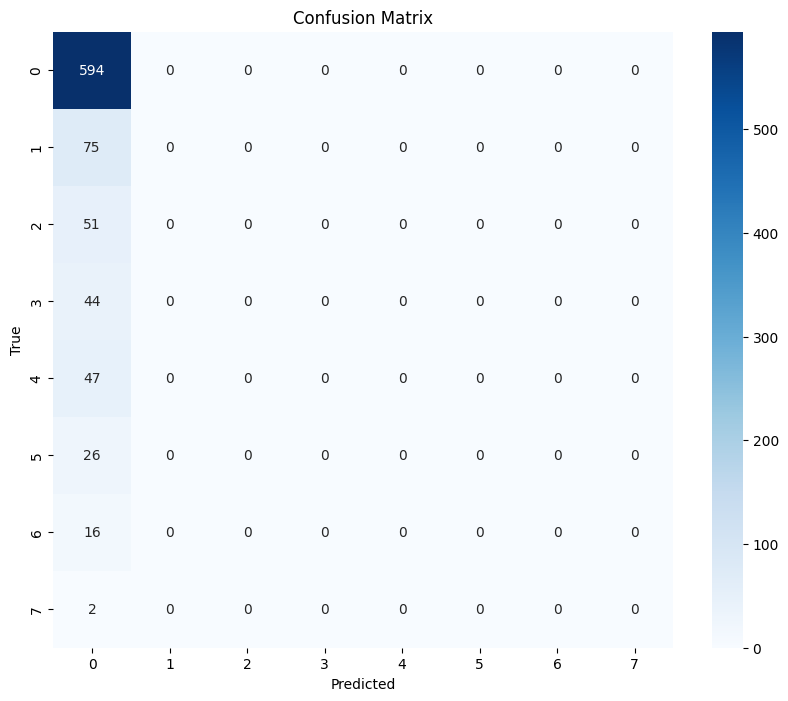

In [92]:
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.53      0.67       594
           1       0.35      0.49      0.41        75
           2       0.40      0.61      0.48        51
           3       0.24      0.59      0.34        44
           4       0.35      0.74      0.47        47
           5       0.23      0.58      0.33        26
           6       0.23      0.50      0.31        16
           7       0.07      0.50      0.12         2

    accuracy                           0.55       855
   macro avg       0.35      0.57      0.39       855
weighted avg       0.73      0.55      0.59       855

Balanced Accuracy: 0.57
Confusion Matrix:
 [[315  52  43  73  54  30  17  10]
 [ 13  37   2   5   7   7   3   1]
 [  6   5  31   2   1   4   2   0]
 [  5   4   1  26   1   3   3   1]
 [  4   2   0   0  35   4   1   1]
 [  1   5   0   1   3  15   0   1]
 [  4   1   0   2   0   1   8   0]
 [  0   0   0   0   0   0   1   1]]


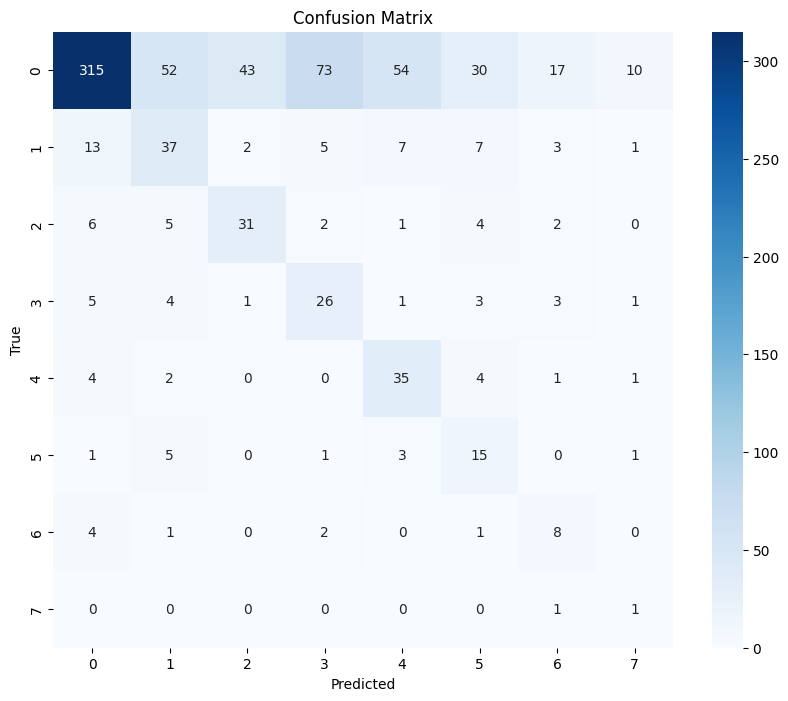

In [93]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE()),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Complement Naive Bayes

In [94]:
# Fitting and transforming the 'Category' column
X_train, X_test, y_train, y_test = train_test_split(
    process_df.stemmed_text,
    process_df.encoded_label,
    test_size=0.2,
    random_state=48,
)

In [95]:
from sklearn.naive_bayes import ComplementNB
clf = Pipeline([
    ('vectorizer_tfid',TfidfVectorizer()),
    ('Complement NB',ComplementNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       594
           1       0.61      0.19      0.29        75
           2       0.58      0.29      0.39        51
           3       0.88      0.32      0.47        44
           4       0.69      0.51      0.59        47
           5       0.45      0.19      0.27        26
           6       1.00      0.12      0.22        16
           7       0.00      0.00      0.00         2

    accuracy                           0.75       855
   macro avg       0.62      0.32      0.38       855
weighted avg       0.73      0.75      0.71       855



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
from sklearn.metrics import classification_report, balanced_accuracy_score

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

Balanced Accuracy: 0.32


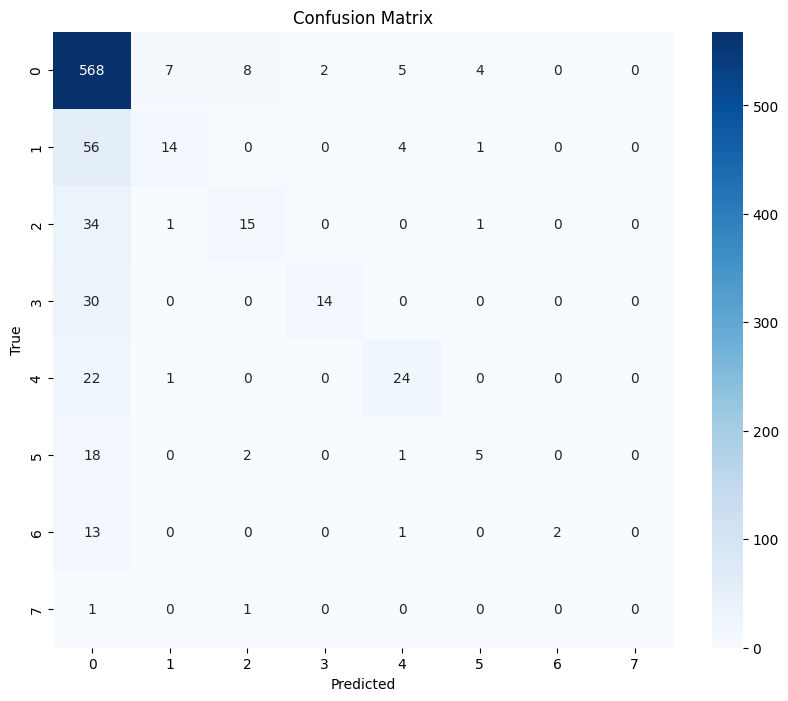

In [97]:
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.39      0.55       594
           1       0.32      0.44      0.37        75
           2       0.33      0.65      0.44        51
           3       0.22      0.52      0.31        44
           4       0.34      0.77      0.47        47
           5       0.21      0.62      0.31        26
           6       0.14      0.56      0.22        16
           7       0.02      0.50      0.04         2

    accuracy                           0.45       855
   macro avg       0.31      0.56      0.34       855
weighted avg       0.71      0.45      0.49       855

Balanced Accuracy: 0.56
Confusion Matrix:
 [[233  53  61  73  58  43  40  33]
 [ 11  33   2   4   7   6   7   5]
 [  4   6  33   1   1   5   1   0]
 [  4   4   0  23   1   3   7   2]
 [  2   1   1   1  36   4   1   1]
 [  1   3   1   0   3  16   0   2]
 [  3   2   0   1   0   1   9   0]
 [  0   0   1   0   0   0   0   1]]


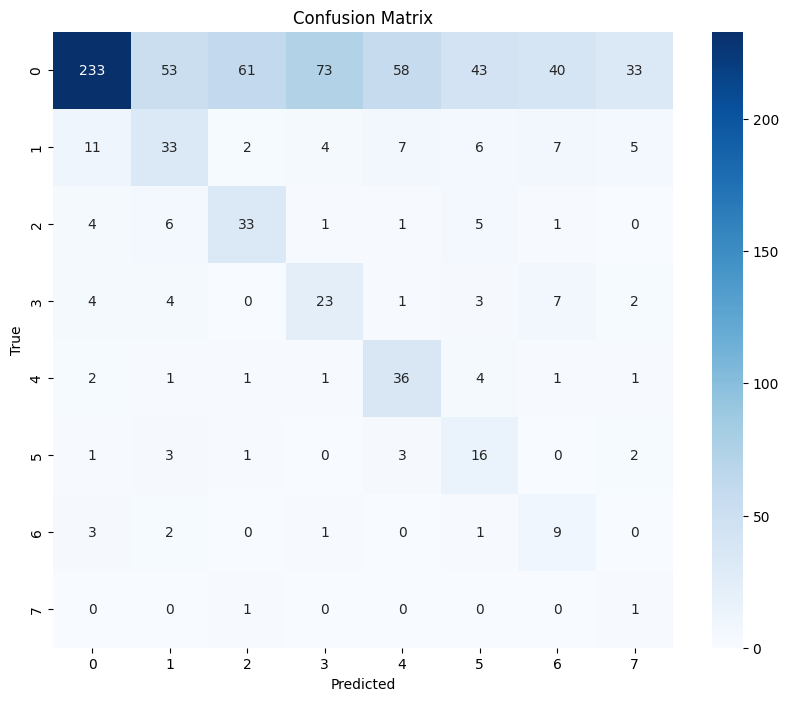

In [99]:
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=420)),
    ('Complement NB', ComplementNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Hypertuning MNB

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics

In [ ]:
def objective(trial):
    # Define hyperparameter search space
    params = {
        'vectorizer_tfid__max_df': trial.suggest_float('max_df', 0.7, 1.0),
        'vectorizer_tfid__min_df': trial.suggest_int('min_df', 1, 5),
        'vectorizer_tfid__ngram_range': trial.suggest_categorical('ngram_range', [(1, 1), (1, 2), (1, 3)]),
        'Multi_NB__alpha': trial.suggest_float('alpha', 0.0001, 10.0, log=True),
        'Multi_NB__fit_prior': trial.suggest_categorical('fit_prior', [True, False]),
    }

    # Create pipeline with preprocessing, oversampling, and classifier
    clf = Pipeline([
        ('vectorizer_tfid', TfidfVectorizer()),
        ('smote', SMOTE(random_state=42)),
        ('Multi_NB', MultinomialNB())
    ])

    clf.set_params(**params)

    # Perform cross-validation
    y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    balanced_acc = balanced_accuracy_score(y_train, y_pred)
    return balanced_acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Adjust the number of trials as needed

best_params = study.best_params
best_balanced_accuracy = study.best_value

print("Best Parameters:", best_params)
print("Best Balanced Accuracy:", best_balanced_accuracy)

[I 2024-06-16 18:02:08,043] A new study created in memory with name: no-name-e617282a-b916-417a-acfe-3023c0d1c212
[I 2024-06-16 18:02:10,934] Trial 0 finished with value: 0.34250662485187083 and parameters: {'max_df': 0.7900313733558876, 'min_df': 5, 'ngram_range': (1, 2), 'alpha': 0.0017279811677686475, 'fit_prior': False}. Best is trial 0 with value: 0.34250662485187083.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for 

Best Parameters: {'max_df': 0.7934048320367862, 'min_df': 1, 'ngram_range': (1, 2), 'alpha': 2.052022106650553, 'fit_prior': True}
Best Balanced Accuracy: 0.4779936617706554


Best Parameters: {'max_df': 0.7934048320367862, 'min_df': 1, 'ngram_range': (1, 2), 'alpha': 2.052022106650553, 'fit_prior': True}
Best Balanced Accuracy: 0.4779936617706554

In [ ]:
best_params = {'max_df': 0.7934048320367862, 'min_df': 1, 'ngram_range': (1, 2), 'alpha': 2.052022106650553, 'fit_prior': True}

clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('Multi_NB', MultinomialNB())
])

              precision    recall  f1-score   support

           0       0.88      0.35      0.50       581
           1       0.26      0.37      0.30        71
           2       0.32      0.75      0.44        51
           3       0.21      0.58      0.31        50
           4       0.31      0.76      0.44        51
           5       0.20      0.32      0.25        34
           6       0.09      0.35      0.15        17
           7       0.04      1.00      0.08         1

    accuracy                           0.41       856
   macro avg       0.29      0.56      0.31       856
weighted avg       0.68      0.41      0.45       856

Balanced Accuracy: 0.5602336604079949


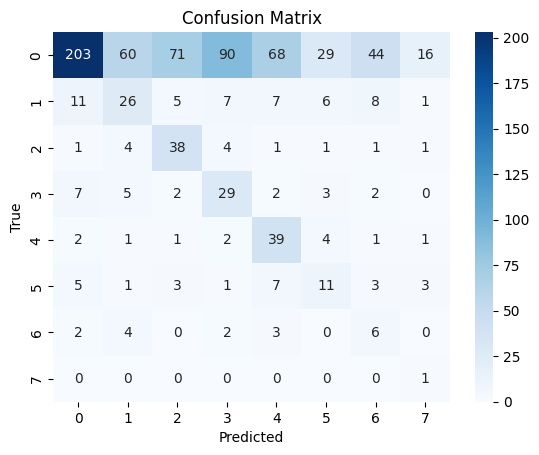

In [ ]:
# Update the keys to match the pipeline structure
updated_best_params = {
    'vectorizer_tfid__max_df': best_params['max_df'],
    'vectorizer_tfid__min_df': best_params['min_df'],
    'vectorizer_tfid__ngram_range': best_params['ngram_range'],
    'Multi_NB__alpha': best_params['alpha'],
    'Multi_NB__fit_prior': best_params['fit_prior']
}

clf.set_params(**updated_best_params)

# Fit on the entire training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Hypertuning CNB

In [ ]:
import optuna
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics

In [ ]:
def objective(trial):
    # Define hyperparameter search space
    params = {
        'vectorizer_tfid__max_df': trial.suggest_float('max_df', 0.7, 1.0),
        'vectorizer_tfid__min_df': trial.suggest_int('min_df', 1, 5),
        'vectorizer_tfid__ngram_range': trial.suggest_categorical('ngram_range', [(1, 1), (1, 2), (1, 3)]),
        'Complement NB__alpha': trial.suggest_float('alpha', 0.0001, 10.0, log=True),  # Corrected line
        'Complement NB__fit_prior': trial.suggest_categorical('fit_prior', [True, False]),  # Corrected line
    }

    # Create pipeline with preprocessing, oversampling, and classifier
    clf = Pipeline([
        ('vectorizer_tfid', TfidfVectorizer()),
        ('smote', SMOTE(random_state=42)),
        ('Complement NB', ComplementNB())  # Ensure this name matches in set_params
    ])

    clf.set_params(**params)

    # Perform cross-validation
    y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    balanced_acc = balanced_accuracy_score(y_train, y_pred)
    return balanced_acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Adjust the number of trials as needed

best_params = study.best_params
best_balanced_accuracy = study.best_value

print("Best Parameters:", best_params)
print("Best Balanced Accuracy:", best_balanced_accuracy)

[I 2024-06-16 18:05:33,005] A new study created in memory with name: no-name-a9c1f586-8521-4675-9866-764d791bead4
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 3) which is of type tuple.
  warnings.warn(message)
[I 2024-06-16 18:05:34,451] Trial 0 finished with value: 0.381198685895337 and parameters: 

Best Parameters: {'max_df': 0.810499900438489, 'min_df': 1, 'ngram_range': (1, 2), 'alpha': 5.033783532676743, 'fit_prior': False}
Best Balanced Accuracy: 0.4878113146873241


Best Parameters: {'max_df': 0.810499900438489, 'min_df': 1, 'ngram_range': (1, 2), 'alpha': 5.033783532676743, 'fit_prior': False}
Best Balanced Accuracy: 0.4878113146873241

In [ ]:
best_params = {'max_df': 0.810499900438489, 'min_df': 1, 'ngram_range': (1, 2), 'alpha': 5.033783532676743, 'fit_prior': False}

clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('Complement NB', MultinomialNB())
])

              precision    recall  f1-score   support

           0       0.89      0.30      0.44       581
           1       0.26      0.32      0.29        71
           2       0.32      0.76      0.45        51
           3       0.21      0.60      0.31        50
           4       0.28      0.76      0.41        51
           5       0.22      0.35      0.27        34
           6       0.09      0.47      0.15        17
           7       0.03      1.00      0.06         1

    accuracy                           0.38       856
   macro avg       0.29      0.57      0.30       856
weighted avg       0.69      0.38      0.41       856

Balanced Accuracy: 0.57161576831649


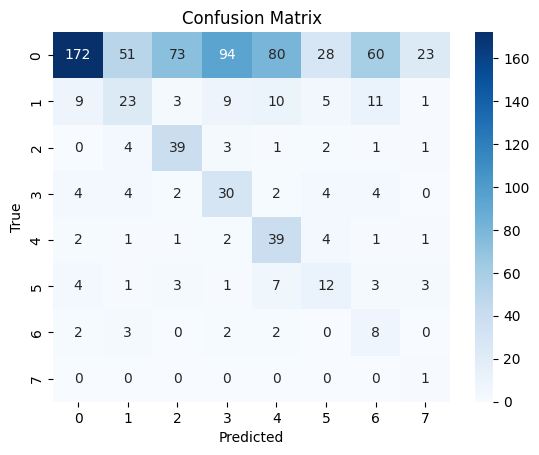

In [ ]:
# Update the keys to match the pipeline structure
updated_best_params = {
    'vectorizer_tfid__max_df': best_params['max_df'],
    'vectorizer_tfid__min_df': best_params['min_df'],
    'vectorizer_tfid__ngram_range': best_params['ngram_range'],
    'Complement NB__alpha': best_params['alpha'],
    'Complement NB__fit_prior': best_params['fit_prior']
}

clf.set_params(**updated_best_params)

# Fit on the entire training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Export

In [ ]:
process_df[['text', 'label']].to_csv('piet_cleaning.csv')

In [ ]:
process_df

,text,label,temp_list,stemmed_text,encoded_label
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,"[kunjungan, prabowo, meresmikan, menyerahkan, ...",kunjungan prabowo meresmikan menyerahkan proye...,5
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,"[anies, tepuk, tangan, meriah, rektor, mewajib...",anies tepuk tangan meriah rektor mewajibkan ma...,0
2,memang benar sih pendukung 01 juga dengan pend...,Demografi,"[memang, benar, sih, pendukung, 01, juga, deng...",memang benar sih pendukung 01 juga dengan pend...,6
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,"[anies, bersikap, kritis, kinerja, prabowo, di...",anies bersikap kritis kinerja prabowo dianggap...,0
4,anies baswedan harap asn tni polri pegang sump...,Politik,"[anies, baswedan, harap, asn, tni, polri, pega...",anies baswedan harap asn tni polri pegang sump...,0
...,...,...,...,...,...
4995,ngeliat debat kemarin pas prabowo kicep kekira...,Politik,"[ngeliat, debat, kemarin, pas, prabowo, kicep,...",ngeliat debat kemarin pas prabowo kicep kekira...,0
4996,masyarakat prabowo gibran memiliki visi sejala...,Politik,"[masyarakat, prabowo, gibran, memiliki, visi, ...",masyarakat prabowo gibran memiliki visi sejala...,0
4997,imo both are irrational but irrational tbh but...,Ekonomi,"[imo, both, are, irrational, but, irrational, ...",imo both are irrational but irrational tbh but...,4
4998,look at that ganjar sudah berkecimpung lgislat...,Pertahanan dan Keamanan,"[look, at, that, ganjar, sudah, berkecimpung, ...",look at that ganjar sudah berkecimpung lgislat...,2
